# Actividad de la semana 4

### Materia: Ciencia y analítica de datos

Prof Jobish Vallikavungal

Prof Roberto Antonio Guevara González

### Nombres: Adriana Camarillo Duran, Laura Munoz Hernandez

### Matrículas: A01551139, A01167496

Fecha de entrega: 11/10/2022

## Parte 1: Ejercicio guiado

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import decomposition

Este es un dataset que tiene como objetivo determinar si una persona puede ser susceptible a crédito o no de acuerdo a un conjunto de variables

In [71]:
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

Utilizamos varias funciones para ver la estructura y características de la base de datos

In [72]:
df = pd.read_csv(url)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [73]:
df.shape

(30000, 25)

In [74]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [75]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

Los nulos nos causan problemas para sacar la varianza, por lo que eliminamos los eliminamos para este ejercicio

In [77]:
df_nulls = df.copy().dropna()
#df.fillna(0)

In [78]:
df_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29958 non-null  int64  
 1   X1      29958 non-null  int64  
 2   X2      29958 non-null  float64
 3   X3      29958 non-null  float64
 4   X4      29958 non-null  float64
 5   X5      29958 non-null  float64
 6   X6      29958 non-null  float64
 7   X7      29958 non-null  float64
 8   X8      29958 non-null  float64
 9   X9      29958 non-null  float64
 10  X10     29958 non-null  float64
 11  X11     29958 non-null  float64
 12  X12     29958 non-null  float64
 13  X13     29958 non-null  float64
 14  X14     29958 non-null  float64
 15  X15     29958 non-null  float64
 16  X16     29958 non-null  float64
 17  X17     29958 non-null  float64
 18  X18     29958 non-null  float64
 19  X19     29958 non-null  float64
 20  X20     29958 non-null  float64
 21  X21     29958 non-null  float64
 22

### Varianza, covarianza y correlación

Primero nos enfocaremos en 2 variables que serían:

- X4 : Marital Status

- X5 : Age

<AxesSubplot:xlabel='X4', ylabel='X5'>

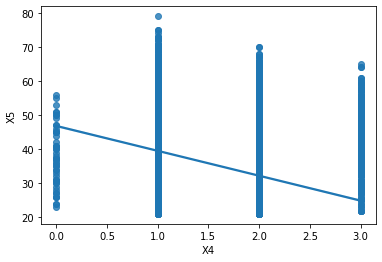

In [79]:
r = sns.regplot(data = df_nulls,  
                x = df_nulls.X4, 
                y = df_nulls.X5
               ) 
r

In [80]:
ndf = df_nulls[['X4', 'X5']]
ndf.corr()

,X4,X5
X4,1.000000,-0.413926
X5,-0.413926,1.000000


In [81]:
np.round(df_nulls.X4.mean(),2)

1.55

In [82]:
np.round(df_nulls.X5.mean(),2)

35.48

In [83]:
Variance = np.cov([df_nulls.X4, df_nulls.X5])
Variance

array([[ 0.27243397, -1.99074799],
       [-1.99074799, 84.90367153]])

In [84]:
ndf = df[['X4','X5']]
ndf.var().sum()

85.24442036100771

In [85]:
t= ndf.var().sum()
varMarital =Variance[0][0]
varAge = Variance[1][1]

Vemos que de la varianza total, Marital Status solo representa el 0.32% por lo que si eliminaramos esa variable, no perderíamos mucha de nuestra variabilidad:

In [86]:
print('Total Variance \t\t\t:', t.round(2) )
print('Varience prop. of Marital Status \t:', ((varMarital/t)*100).round(2),'%' )
print('Varience prop. of Age            \t:', ((varAge/t)*100).round(2),'%' )

Total Variance 			: 85.24
Varience prop. of Marital Status 	: 0.32 %
Varience prop. of Age            	: 99.6 %


Ahora experimentamos con X1 y X5 (Amount y Age)

<AxesSubplot:xlabel='X1', ylabel='X5'>

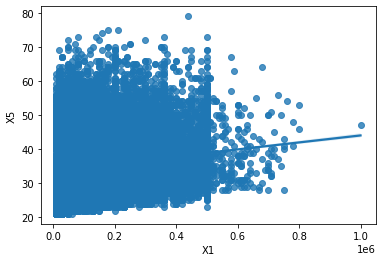

In [87]:
p = sns.regplot(data = df_nulls,  
                x = df_nulls.X1, 
                y = df_nulls.X5
               ) 
p

In [88]:
ndf2 = df_nulls[['X1', 'X5']]
ndf2.corr()

,X1,X5
X1,1.000000,0.144515
X5,0.144515,1.000000


In [89]:
Variance2 = np.cov([df_nulls.X1, df_nulls.X5])
Variance2

array([[1.68317668e+10, 1.72759143e+05],
       [1.72759143e+05, 8.49036715e+01]])

In [90]:
ndf2 = df_nulls[['X1','X5']]
ndf2.var().sum()

16831766859.49057

In [91]:
t2= ndf2.var().sum()
varAmount =Variance2[0][0]
varAge2 = Variance2[1][1]

En este otro caso, vemos que de la varianza total, Age no representa prácticamente nada de la variabilidad:

In [92]:
print('Total Variance \t\t\t:', t2.round(2) )
print('Varience prop. of Amount \t:', ((varAmount/t2)*100).round(2),'%' )
print('Varience prop. of Age    \t:', ((varAge2/t2)*100).round(2),'%' )

Total Variance 			: 16831766859.49
Varience prop. of Amount 	: 100.0 %
Varience prop. of Age    	: 0.0 %


### PCA

Ahora utilizaremos PCA para encontrar una combinación linear de nuestras variables y poder encontrar aquellas que expliquen la mayor cantidad de información posible. 

Primero probamos sólo con dos variables:

In [93]:
pca = PCA(n_components=2)

pca.fit(df_nulls[['X1', 'X5']])

pcaSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                          'Proportion of variance': pca.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)#column 
                          }
                          )
pcaSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,129737.299095,1.000000e+00,1.0
1,9.117593,4.938905e-09,1.0


In [94]:
pcaSummary = pcaSummary.transpose()
pcaSummary.round(2)

,0,1
Standard deviation,129737.3,9.12
Proportion of variance,1.0,0.00
Cumulative proportion,1.0,1.00


Como podemos observar, prácticamente la primera componente explica toda la variabilidad, lo cual era de esperarse dado a los resultados que habíamos visto antes con la varianza.

In [95]:
pcaSummary.columns = ['PC1', 'PC2']
pcaSummary = pcaSummary.round(4)
pcaSummary

,PC1,PC2
Standard deviation,129737.2991,9.1176
Proportion of variance,1.0000,0.0000
Cumulative proportion,1.0000,1.0000


Repetimos el mismo proceso, pero ahora con todas las variables, a excepción del ID:

In [110]:
pca2 = decomposition.PCA(n_components=10)
pc = pca2.fit_transform(df_nulls.iloc[:, 1:-1])

pcaSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca2.explained_variance_),
                          'Proportion of variance': pca2.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pca2.explained_variance_ratio_),
                          'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
                          }
                          )
pcaSummary

,Standard deviation,Proportion of variance,Cumulative proportion,PC
0,166585.075260,0.610571,0.610571,PC1
1,115824.701663,0.295166,0.905738,PC2
2,37256.816553,0.030540,0.936278,PC3
3,27747.103019,0.016939,0.953218,PC4
4,20698.682257,0.009426,0.962644,PC5
5,20278.007203,0.009047,0.971691,PC6
6,18520.701884,0.007547,0.979238,PC7
7,17040.234998,0.006389,0.985627,PC8
8,16294.110103,0.005842,0.991469,PC9
9,11615.224907,0.002968,0.994437,PC10


Graficamos la varianza explicada por los componentes para tener una mejor idea de los resultados:

In [112]:
import matplotlib as mpl
import matplotlib.pyplot as plt

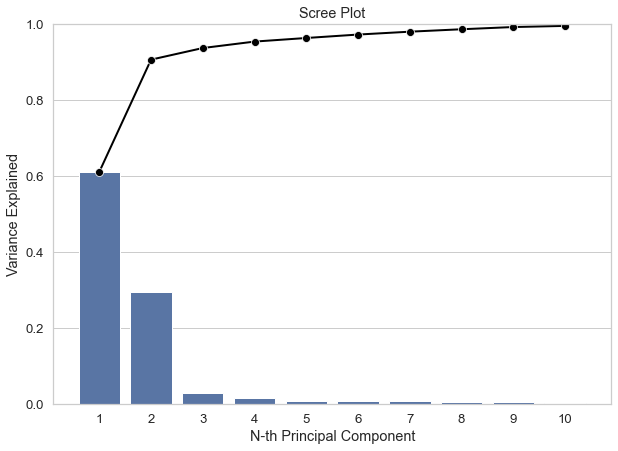

In [115]:
PC_components = np.arange(pca2.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pca2.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pca2.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

## Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

#### ¿Cuál es el número de componentes mínimo y por qué?

###### El número mínimo es de 2 componentes ya que con eso contamos con el 90% de la varianza de los datos



#### ¿Cuál es la variación de los datos que representan esos componentes?

###### 90.42%

#### ¿Cuál es la pérdida de información después de realizar PCA?

###### 9.58%

#### De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

###### La variable más importante es la del monto del crédito otorgado y la de menor importancia sería la edad




#### ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning? 